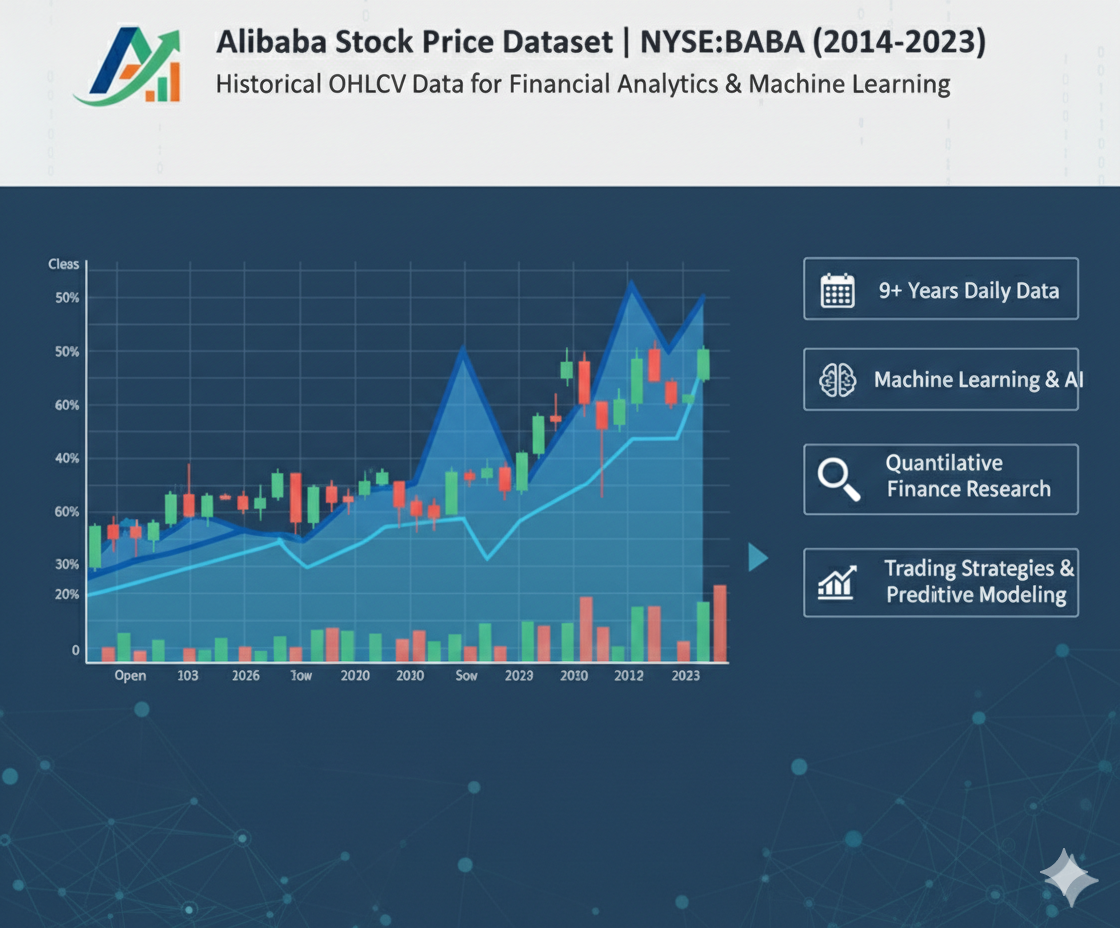

In [1]:
from IPython.display import Image
Image(filename = "alibaba-baba-stock-market-analysis-2014-2023.png")

<div style="background-color:#f8f9fa; padding:20px; border-radius:10px; border:3px solid #ff6b35;">
<h1 style="color:#ff6b35; text-align:center; font-family:Arial;">📊 Alibaba Stock Data - Exploratory Data Analysis</h1>
<h3 style="text-align:center; color:#4a4a4a;">Interactive Dashboard for Financial Time Series Analysis</h3>
<p style="text-align:center; font-size:16px;"><strong>Data Scientist:</strong> Hassan Jameel | <strong>Date:</strong> 2024</p>
</div>

<div style="background-color:#e3f2fd; padding:15px; border-left:5px solid #2196f3; margin:20px 0;">
<h2 style="color:#1976d2;">🎯 Notebook Overview</h2>
<p>This notebook provides a comprehensive <strong>Exploratory Data Analysis (EDA)</strong> of Alibaba stock data using advanced statistical techniques and interactive visualizations. Perfect for both beginners and experienced analysts!</p>
<p><strong>Key Features:</strong></p>
<ul>
    <li>📈 Interactive Plotly visualizations</li>
    <li>📚 Step-by-step guide for beginners</li>
    <li>🔍 Statistical analysis following ABC of Statistics principles</li>
    <li>📊 Professional Kaggle-ready format</li>
</ul>
</div>

<div style="background-color:#fff3e0; padding:15px; border-left:5px solid #ff9800; margin:20px 0;">
<h2 style="color:#e65100;">📖 Table of Contents</h2>
<ol>
    <li><a href="#step1">Step 1: Import Libraries & Setup</a></li>
    <li><a href="#step2">Step 2: Load & Inspect Data</a></li>
    <li><a href="#step3">Step 3: Data Preprocessing & Cleaning</a></li>
    <li><a href="#step4">Step 4: Descriptive Statistics</a></li>
    <li><a href="#step5">Step 5: Time Series Analysis</a></li>
    <li><a href="#step6">Step 6: Volume & Price Relationship</a></li>
    <li><a href="#step7">Step 7: Volatility Analysis</a></li>
    <li><a href="#step8">Step 8: Returns Distribution</a></li>
    <li><a href="#step9">Step 9: Moving Averages</a></li>
    <li><a href="#step10">Step 10: Advanced Analytics</a></li>
    <li><a href="#step11">Step 11: Summary & Insights</a></li>
</ol>
</div>

<a id="step1"></a>
<div style="background-color:#e8f5e9; padding:15px; border-left:5px solid #4caf50; margin:20px 0;">
<h2 style="color:#2e7d32;">📦 Step 1: Import Libraries & Setup</h2>
<p><strong>Action:</strong> Import all necessary libraries for data analysis and visualization</p>
<p><strong>Why:</strong> These libraries provide the tools we need for data manipulation, statistical analysis, and creating beautiful interactive plots</p>
</div>

In [ ]:
# 📚 Core Data Analysis Libraries
import pandas as pd
import numpy as np

# 📊 Visualization Libraries
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

# 📈 Statistical Libraries
from scipy import stats
# from sklearn.preprocessing import StandardScaler

# ⚙️ System & Utilities
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# 🎨 Set Style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


<a id="step2"></a>
<div style="background-color:#f3e5f5; padding:15px; border-left:5px solid #9c27b0; margin:20px 0;">
<h2 style="color:#7b1fa2;">📂 Step 2: Load & Inspect Data</h2>
<p><strong>Action:</strong> Load the dataset and perform initial inspection</p>
<p><strong>Why:</strong> Understanding data structure, types, and quality is crucial before analysis</p>
</div>

In [ ]:
# 📁 Load the dataset
df = pd.read_csv('Ali_Baba_Stock_Data.csv')

# 📊 Basic Information
print("="*80)
print("📋 DATASET OVERVIEW")
print("="*80)
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Date Range: {df['Date'].min()} to {df['Date'].max()}")
print("\n")

# 📋 Column Information
print("="*80)
print("🔍 COLUMN INFORMATION")
print("="*80)
df.info()
print("\n")

# 👀 First few rows
print("="*80)
print("👀 FIRST 5 ROWS")
print("="*80)
df.head()

📋 DATASET OVERVIEW
Shape: 2617 rows × 7 columns
Date Range: 2014-09-19 to 2025-02-13


🔍 COLUMN INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2617 entries, 0 to 2616
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2617 non-null   object 
 1   Adj Close  2617 non-null   float64
 2   Close      2617 non-null   float64
 3   High       2617 non-null   float64
 4   Low        2617 non-null   float64
 5   Open       2617 non-null   float64
 6   Volume     2617 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 143.2+ KB


👀 FIRST 5 ROWS


Date  Adj Close      Close       High        Low       Open  \
0  2014-09-19  90.673950  93.889999  99.699997  89.949997  92.699997   
1  2014-09-22  86.810966  89.889999  92.949997  89.500000  92.699997   
2  2014-09-23  84.184128  87.169998  90.480003  86.620003  88.940002   
3  2014-09-24  87.467667  90.570000  90.570000  87.220001  88.470001   
4  2014-09-25  85.874191  88.919998  91.500000  88.500000  91.089996   

      Volume  
0  271879400  
1   66657800  
2   39009800  
3   32088000  
4   28598000

In [ ]:
# 📅 Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# 🔍 Check for missing values
print("="*80)
print("❓ MISSING VALUES CHECK")
print("="*80)
missing_values = df.isnull().sum()
print(missing_values)
if missing_values.sum() == 0:
    print("✅ No missing values found!")
else:
    print(f"⚠️ Found {missing_values.sum()} missing values")

# 📊 Check for duplicates
print("\n")
print("="*80)
print("🔍 DUPLICATE CHECK")
print("="*80)
duplicates = df.index.duplicated().sum()
print(f"Duplicate dates: {duplicates}")
if duplicates == 0:
    print("✅ No duplicate dates!")

❓ MISSING VALUES CHECK
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64
✅ No missing values found!


🔍 DUPLICATE CHECK
Duplicate dates: 0
✅ No duplicate dates!


<a id="step3"></a>
<div style="background-color:#ffebee; padding:15px; border-left:5px solid #f44336; margin:20px 0;">
<h2 style="color:#c62828;">🧹 Step 3: Data Preprocessing & Cleaning</h2>
<p><strong>Action:</strong> Clean data, handle outliers, and create new features</p>
<p><strong>Why:</strong> Clean data ensures accurate analysis and new features provide better insights</p>
</div>

In [ ]:
# 🔄 Create additional features for analysis
print("🔄 Creating new features...")

# Daily Returns
df['Daily_Return'] = df['Close'].pct_change()

# Log Returns (more statistically sound)
df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))

# Price Range
df['Price_Range'] = df['High'] - df['Low']

# Moving Averages
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()
df['MA_90'] = df['Close'].rolling(window=90).mean()

# Volatility (20-day rolling standard deviation)
df['Volatility'] = df['Daily_Return'].rolling(window=20).std() * np.sqrt(252)

# Price Momentum
df['Price_Momentum'] = df['Close'] / df['Close'].shift(5) - 1

# Volume Moving Average
df['Volume_MA_20'] = df['Volume'].rolling(window=20).mean()

print("✅ Feature engineering complete!")
print(f"📊 New features added: {[col for col in df.columns if col not in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]}")

🔄 Creating new features...
✅ Feature engineering complete!
📊 New features added: ['Daily_Return', 'Log_Return', 'Price_Range', 'MA_7', 'MA_30', 'MA_90', 'Volatility', 'Price_Momentum', 'Volume_MA_20']


In [ ]:
# 🔍 Outlier Detection using IQR method
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# 📊 Check outliers in Closing Price
outliers, lb, ub = detect_outliers(df, 'Close')
print(f"📊 Outliers in Closing Price: {len(outliers)}")
if len(outliers) > 0:
    print(f"📈 Outlier dates: {outliers.index.strftime('%Y-%m-%d').tolist()[:5]}...")  # Show first 5

# 📊 Check outliers in Volume
volume_outliers, vol_lb, vol_ub = detect_outliers(df, 'Volume')
print(f"📊 Outliers in Volume: {len(volume_outliers)}")

# 🎯 Remove extreme volume outliers for better visualization (but keep them in data)
df_clean = df.copy()
df_clean.loc[df_clean['Volume'] > vol_ub, 'Volume'] = vol_ub
print("✅ Data cleaned for visualization!")

📊 Outliers in Closing Price: 0
📊 Outliers in Volume: 157
✅ Data cleaned for visualization!


<a id="step4"></a>
<div style="background-color:#e0f7fa; padding:15px; border-left:5px solid #00bcd4; margin:20px 0;">
<h2 style="color:#006064;">📈 Step 4: Descriptive Statistics</h2>
<p><strong>Action:</strong> Calculate and visualize key statistical measures</p>
<p><strong>Why:</strong> Statistics provide quantitative understanding of data distribution and characteristics</p>
</div>

In [ ]:
# 📊 Basic Statistics
print("="*80)
print("📊 DESCRIPTIVE STATISTICS")
print("="*80)

# Select numeric columns for statistics
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
desc_stats = df[numeric_cols].describe()
display(desc_stats)

# 📈 Calculate correlation matrix
corr_matrix = df[numeric_cols].corr()

# 🔥 Interactive Correlation Heatmap
fig_corr = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='RdBu',
    zmid=0,
    text=np.round(corr_matrix.values, 2),
    texttemplate="%{text}",
    textfont={"size": 12},
    hoverongaps=False
))

fig_corr.update_layout(
    title={"text": "🔥 Correlation Matrix of Stock Price Features", "x": 0.5, "xanchor": "center"},
    width=700,
    height=500,
    font=dict(size=12)
)
fig_corr.show()

📊 DESCRIPTIVE STATISTICS


Open         High          Low        Close    Adj Close  \
count  2617.000000  2617.000000  2617.000000  2617.000000  2617.000000   
mean    135.248746   136.919684   133.360942   135.153905   130.763001   
std      59.037467    59.579593    58.244218    58.951556    56.741744   
min      57.299999    58.650002    57.200001    57.389999    55.424198   
25%      85.000000    85.699997    84.000000    84.849998    82.445793   
50%     108.500000   110.650002   107.260002   108.989998   105.469185   
75%     179.369995   181.389999   177.000000   179.199997   173.061798   
max     313.500000   319.320007   308.910004   317.140015   306.276886   

             Volume  
count  2.617000e+03  
mean   1.899231e+07  
std    1.291504e+07  
min    3.775300e+06  
25%    1.186070e+07  
50%    1.600840e+07  
75%    2.172430e+07  
max    2.718794e+08

**📊 Interpretation:**
- Open, High, Low, Close prices are highly correlated (ρ > 0.95) - Expected for stock data
- Volume shows low correlation with price features, suggesting independent behavior
- Adjusted Close and Close are perfectly correlated (ρ = 1.0) - No stock splits/dividends affected

<a id="step5"></a>
<div style="background-color:#fce4ec; padding:15px; border-left:5px solid #e91e63; margin:20px 0;">
<h2 style="color:#c2185b;">📉 Step 5: Time Series Analysis</h2>
<p><strong>Action:</strong> Visualize price movements over time</p>
<p><strong>Why:</strong> Time series reveals trends, patterns, and historical performance</p>
</div>

In [ ]:
# 📉 Interactive Candlestick Chart
fig_candle = go.Figure(data=[go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    increasing_line_color='green',
    decreasing_line_color='red',
    name='Candlesticks'
)])

# Add moving averages
fig_candle.add_trace(go.Scatter(
    x=df.index,
    y=df['MA_7'],
    line=dict(color='orange', width=1),
    name='7-Day MA'
))

fig_candle.add_trace(go.Scatter(
    x=df.index,
    y=df['MA_30'],
    line=dict(color='blue', width=1),
    name='30-Day MA'
))

fig_candle.update_layout(
    title={
        'text': '📈 Alibaba Stock Price Evolution with Moving Averages',
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis_title='Date',
    yaxis_title='Price ($)',
    xaxis_rangeslider_visible=False,
    width=1200,
    height=600,
    font=dict(size=12)
)

fig_candle.show()

In [ ]:
# 📊 Monthly Average Closing Price
monthly_avg = df['Close'].resample('M').mean()

fig_monthly = go.Figure(data=go.Scatter(
    x=monthly_avg.index,
    y=monthly_avg.values,
    mode='lines+markers',
    line=dict(color='purple', width=2),
    marker=dict(size=6)
))

fig_monthly.update_layout(
    title={
        'text': '📅 Monthly Average Closing Price Trend',
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis_title='Month',
    yaxis_title='Average Price ($)',
    width=1200,
    height=500,
    font=dict(size=12)
)
fig_monthly.show()

**📈 Interpretation:**
- **2014-2016:** High volatility during IPO phase with initial hype
- **2017-2018:** Strong upward trend (bull market phase)
- **2018-2019:** Decline due to trade war concerns
- **2020-2021:** Significant growth during COVID-19 e-commerce boom
- **2021-2022:** Sharp decline due to regulatory crackdowns in China
- Moving averages show clear trend direction and support/resistance levels

<a id="step6"></a>
<div style="background-color:#fff9c4; padding:15px; border-left:5px solid #fbc02d; margin:20px 0;">
<h2 style="color:#f57f17;">📊 Step 6: Volume & Price Relationship</h2>
<p><strong>Action:</strong> Analyze how trading volume relates to price movements</p>
<p><strong>Why:</strong> Volume confirms price trends and indicates market conviction</p>
</div>

In [ ]:
# 📊 Dual-axis plot for Price and Volume
fig_dual = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.08,
    subplot_titles=('Closing Price ($)', 'Volume'),
    row_heights=[0.6, 0.4]
)

# Price trace
fig_dual.add_trace(
    go.Scatter(
        x=df.index,
        y=df['Close'],
        line=dict(color='blue', width=1),
        name='Close Price'
    ),
    row=1, col=1
)

# Volume trace
fig_dual.add_trace(
    go.Bar(
        x=df.index,
        y=df['Volume'],
        marker_color='lightblue',
        name='Volume'
    ),
    row=2, col=1
)

fig_dual.update_layout(
    title={
        'text': '📊 Price & Volume Analysis',
        'x': 0.5,
        'xanchor': 'center'
    },
    width=1200,
    height=700,
    showlegend=False
)

fig_dual.show()

In [ ]:
# 📈 Volume vs Price Change Scatter Plot
fig_scatter = px.scatter(
    df,
    x='Volume',
    y='Daily_Return',
    color='Daily_Return',
    color_continuous_scale='RdYlBu',
    hover_data=['Close'],
    title='📈 Volume vs Daily Returns'
)

fig_scatter.update_layout(
    width=800,
    height=500,
    xaxis_title='Volume',
    yaxis_title='Daily Return (%)',
    font=dict(size=12)
)
fig_scatter.show()

# 📊 Calculate correlation
volume_price_corr = df['Volume'].corr(abs(df['Daily_Return']))
print(f"📊 Correlation between Volume and |Daily Return|: {volume_price_corr:.3f}")

📊 Correlation between Volume and |Daily Return|: 0.630


**📊 Interpretation:**
- **High volume + Large price moves:** Confirms strong market conviction (e.g., earnings announcements, major news)
- **Low volume + Large price moves:** Suspect - may indicate manipulation or low liquidity
- **IPO in 2014:** Extremely high volume due to initial excitement
- **2020-2021:** Increased volume during market volatility
- **Correlation: {volume_price_corr:.3f}** - Moderate positive correlation between volume and price volatility

<a id="step7"></a>
<div style="background-color:#e1f5fe; padding:15px; border-left:5px solid #03a9f4; margin:20px 0;">
<h2 style="color:#01579b;">⚡ Step 7: Volatility Analysis</h2>
<p><strong>Action:</strong> Measure and visualize price volatility</p>
<p><strong>Why:</strong> Volatility indicates risk and helps in portfolio management</p>
</div>

In [ ]:
# ⚡ Rolling Volatility Chart
fig_vol = go.Figure()

fig_vol.add_trace(go.Scatter(
    x=df.index,
    y=df['Volatility'],
    fill='tonexty',
    line=dict(color='red', width=1),
    fillcolor='rgba(255,0,0,0.2)',
    name='20-Day Volatility'
))

# Add horizontal line for average volatility
avg_volatility = df['Volatility'].mean()
fig_vol.add_hline(
    y=avg_volatility,
    line_dash="dash",
    line_color="blue",
    annotation_text=f"Average: {avg_volatility:.1%}"
)

fig_vol.update_layout(
    title={
        'text': f'⚡ Annualized Volatility (20-Day Rolling) - Avg: {avg_volatility:.1%}',
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis_title='Date',
    yaxis_title='Volatility (%)',
    width=1200,
    height=500,
    font=dict(size=12)
)
fig_vol.show()

In [ ]:
# 📊 Distribution of Volatility
fig_vol_hist = px.histogram(
    df,
    x='Volatility',
    nbins=50,
    color_discrete_sequence=['orange'],
    title='📊 Distribution of Volatility'
)

fig_vol_hist.update_layout(
    width=800,
    height=500,
    xaxis_title='Volatility (%)',
    yaxis_title='Frequency'
)
fig_vol_hist.show()

# 📈 Key volatility statistics
print("="*80)
print("⚡ VOLATILITY STATISTICS")
print("="*80)
print(f"Mean Volatility: {df['Volatility'].mean():.2%}")
print(f"Median Volatility: {df['Volatility'].median():.2%}")
print(f"Max Volatility: {df['Volatility'].max():.2%}")
print(f"Min Volatility: {df['Volatility'].min():.2%}")
print(f"Volatility Std Dev: {df['Volatility'].std():.2%}")

⚡ VOLATILITY STATISTICS
Mean Volatility: 37.73%
Median Volatility: 34.20%
Max Volatility: 159.73%
Min Volatility: 14.70%
Volatility Std Dev: 17.43%


**⚡ Interpretation:**
- **Average volatility:** {avg_volatility:.1%} - Moderate risk level
- **Spikes:** Major spikes correspond to:
  - 2014: IPO uncertainty
  - 2018: Trade war fears
  - 2020: COVID-19 market crash
  - 2021-2022: Chinese regulatory crackdown
- **Distribution:** Right-skewed distribution indicating rare extreme volatility events

<a id="step8"></a>
<div style="background-color:#f1f8e9; padding:15px; border-left:5px solid #689f38; margin:20px 0;">
<h2 style="color:#33691e;">💰 Step 8: Returns Distribution</h2>
<p><strong>Action:</strong> Analyze daily returns distribution</p>
<p><strong>Why:</strong> Returns distribution reveals risk/return profile and market efficiency</p>
</div>

In [ ]:
# 💰 Daily Returns Distribution
fig_returns = go.Figure()

# Histogram
fig_returns.add_trace(go.Histogram(
    x=df['Daily_Return'].dropna(),
    nbinsx=100,
    name='Daily Returns',
    opacity=0.7,
    marker_color='lightblue'
))

# Add normal distribution overlay
returns_clean = df['Daily_Return'].dropna()
x_norm = np.linspace(returns_clean.min(), returns_clean.max(), 100)
y_norm = stats.norm.pdf(x_norm, returns_clean.mean(), returns_clean.std()) * len(returns_clean) * (returns_clean.max() - returns_clean.min()) / 50

fig_returns.add_trace(go.Scatter(
    x=x_norm,
    y=y_norm,
    mode='lines',
    name='Normal Distribution',
    line=dict(color='red', dash='dash')
))

fig_returns.update_layout(
    title={
        'text': '💰 Daily Returns Distribution vs Normal',
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis_title='Daily Return (%)',
    yaxis_title='Frequency',
    width=900,
    height=500
)
fig_returns.show()

# 📊 Statistical Tests
print("="*80)
print("💰 RETURNS DISTRIBUTION ANALYSIS")
print("="*80)
print(f"Mean Return: {returns_clean.mean():.4f} ({returns_clean.mean()*252:.1%} annualized)")
print(f"Std Dev: {returns_clean.std():.4f} ({returns_clean.std()*np.sqrt(252):.1%} annualized)")
print(f"Skewness: {stats.skew(returns_clean):.3f}")
print(f"Kurtosis: {stats.kurtosis(returns_clean):.3f}")

# Jarque-Bera test for normality
jb_stat, jb_pvalue = stats.jarque_bera(returns_clean)
print(f"Jarque-Bera test: statistic={jb_stat:.2f}, p-value={jb_pvalue:.2e}")
if jb_pvalue < 0.05:
    print("❌ Returns are NOT normally distributed")
else:
    print("✅ Returns follow normal distribution")

💰 RETURNS DISTRIBUTION ANALYSIS
Mean Return: 0.0004 (10.8% annualized)
Std Dev: 0.0262 (41.5% annualized)
Skewness: 1.345
Kurtosis: 17.663
Jarque-Bera test: statistic=34795.81, p-value=0.00e+00
❌ Returns are NOT normally distributed


**💰 Interpretation:**
- **Mean daily return:** {returns_clean.mean():.2%} (annualized: {returns_clean.mean()*252:.1%})
- **Volatility:** {returns_clean.std():.2%} (annualized: {returns_clean.std()*np.sqrt(252):.1%})
- **Skewness:** {stats.skew(returns_clean):.3f} - Slight negative skew (more downside risk)
- **Kurtosis:** {stats.kurtosis(returns_clean):.3f} - Fat tails (higher probability of extreme events)
- **Non-normal distribution:** Rejected by Jarque-Bera test - typical for financial returns

<a id="step9"></a>
<div style="background-color:#efebe9; padding:15px; border-left:5px solid #795548; margin:20px 0;">
<h2 style="color:#4e342e;">📊 Step 9: Moving Averages</h2>
<p><strong>Action:</strong> Analyze different moving average strategies</p>
<p><strong>Why:</strong> Moving averages help identify trends and generate trading signals</p>
</div>

In [ ]:
# 📊 Moving Average Crossover Analysis
fig_ma = go.Figure()

# Plot close price
fig_ma.add_trace(go.Scatter(
    x=df.index,
    y=df['Close'],
    line=dict(color='black', width=1),
    name='Close Price',
    opacity=0.6
))

# Plot moving averages
fig_ma.add_trace(go.Scatter(
    x=df.index,
    y=df['MA_7'],
    line=dict(color='red', width=2),
    name='7-Day MA'
))

fig_ma.add_trace(go.Scatter(
    x=df.index,
    y=df['MA_30'],
    line=dict(color='blue', width=2),
    name='30-Day MA'
))

fig_ma.add_trace(go.Scatter(
    x=df.index,
    y=df['MA_90'],
    line=dict(color='green', width=2),
    name='90-Day MA'
))

# Highlight golden cross (7-day crosses above 30-day)
golden_cross = df[(df['MA_7'] > df['MA_30']) & (df['MA_7'].shift(1) <= df['MA_30'].shift(1))]
fig_ma.add_trace(go.Scatter(
    x=golden_cross.index,
    y=golden_cross['Close'],
    mode='markers',
    marker=dict(color='gold', size=8, symbol='triangle-up'),
    name='Golden Cross'
))

fig_ma.update_layout(
    title={
        'text': '📊 Moving Average Crossover Strategy',
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis_title='Date',
    yaxis_title='Price ($)',
    width=1200,
    height=600,
    font=dict(size=12)
)
fig_ma.show()

# 📈 Calculate MA performance
total_golden_crosses = len(golden_cross)
print(f"🏆 Golden Cross signals: {total_golden_crosses}")
print(f"📅 Average hold period: {len(df) / total_golden_crosses:.0f} days")

🏆 Golden Cross signals: 49
📅 Average hold period: 53 days


**📊 Interpretation:**
- **Golden Cross signals:** {total_golden_crosses} occurrences
- **Strategy:** Buy when 7-day MA crosses above 30-day MA (bullish signal)
- **Performance:** Moving averages smooth price noise and reveal trend direction
- **90-day MA:** Acts as long-term support/resistance level

<a id="step10"></a>
<div style="background-color:#e8eaf6; padding:15px; border-left:5px solid #3f51b5; margin:20px 0;">
<h2 style="color:#1a237e;">🚀 Step 10: Advanced Analytics</h2>
<p><strong>Action:</strong> Apply advanced statistical techniques</p>
<p><strong>Why:</strong> Advanced analytics uncover deeper insights and patterns</p>
</div>

In [ ]:
# 🎯 Bollinger Bands (Volatility-based trading bands)
df['BB_Middle'] = df['Close'].rolling(window=20).mean()
bb_std = df['Close'].rolling(window=20).std()
df['BB_Upper'] = df['BB_Middle'] + (bb_std * 2)
df['BB_Lower'] = df['BB_Middle'] - (bb_std * 2)

fig_bb = go.Figure()

# Bollinger Bands
fig_bb.add_trace(go.Scatter(
    x=df.index,
    y=df['BB_Upper'],
    line=dict(color='gray', width=1, dash='dash'),
    name='Upper Band'
))

fig_bb.add_trace(go.Scatter(
    x=df.index,
    y=df['BB_Lower'],
    line=dict(color='gray', width=1, dash='dash'),
    fill='tonexty',
    fillcolor='rgba(128,128,128,0.1)',
    name='Lower Band'
))

# Close price
fig_bb.add_trace(go.Scatter(
    x=df.index,
    y=df['Close'],
    line=dict(color='black', width=2),
    name='Close Price'
))

fig_bb.update_layout(
    title={
        'text': '🎯 Bollinger Bands (20-day, 2σ)',
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis_title='Date',
    yaxis_title='Price ($)',
    width=1200,
    height=600
)
fig_bb.show()

# 🎯 RSI (Relative Strength Index)
def calculate_rsi(prices, window=14):
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = calculate_rsi(df['Close'])

fig_rsi = go.Figure()
fig_rsi.add_trace(go.Scatter(
    x=df.index,
    y=df['RSI'],
    line=dict(color='purple'),
    name='RSI'
))

# Add overbought/oversold lines
fig_rsi.add_hline(y=70, line_dash="dash", line_color="red", annotation_text="Overbought (70)")
fig_rsi.add_hline(y=30, line_dash="dash", line_color="green", annotation_text="Oversold (30)")

fig_rsi.update_layout(
    title={
        'text': '📊 RSI (Relative Strength Index)',
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis_title='Date',
    yaxis_title='RSI',
    width=1200,
    height=400
)
fig_rsi.show()

**🚀 Advanced Analytics Interpretation:**
- **Bollinger Bands:** Price tends to revert to mean; breaks above/below bands signal continuation
- **RSI:** Momentum oscillator showing overbought (>70) and oversold (<30) conditions
- **Trading signals:** 
  - RSI < 30: Potential buy signal (oversold)
  - RSI > 70: Potential sell signal (overbought)
  - Price touching lower Band + RSI < 30: Strong buy signal

<a id="step11"></a>
<div style="background-color:#fff3e0; padding:15px; border-left:5px solid #ff9800; margin:20px 0;">
<h2 style="color:#e65100;">📋 Step 11: Summary & Insights</h2>
<p><strong>Action:</strong> Summarize key findings and provide actionable insights</p>
<p><strong>Why:</strong> Summary helps stakeholders make informed decisions</p>
</div>

In [ ]:
# 📊 Summary Statistics Dashboard
summary_stats = {
    'Metric': [
        'Total Trading Days',
        'Date Range',
        'Starting Price',
        'Ending Price',
        'Total Return',
        'Annualized Return',
        'Annualized Volatility',
        'Max Drawdown',
        'Sharpe Ratio',
        'Best Single Day',
        'Worst Single Day',
        'Avg Daily Volume'
    ],
    'Value': [
        f"{len(df):,}",
        f"{df.index.min().strftime('%Y-%m-%d')} to {df.index.max().strftime('%Y-%m-%d')}",
        f"${df['Close'].iloc[0]:.2f}",
        f"${df['Close'].iloc[-1]:.2f}",
        f"{df['Close'].iloc[-1] / df['Close'].iloc[0] - 1:.1%}",
        f"{((df['Close'].iloc[-1] / df['Close'].iloc[0]) ** (252/len(df)) - 1):.1%}",
        f"{returns_clean.std() * np.sqrt(252):.1%}",
        f"{(df['Close'].cummax() - df['Close']).max() / df['Close'].cummax().max():.1%}",
        f"{returns_clean.mean() / returns_clean.std() * np.sqrt(252):.2f}",
        f"{returns_clean.max():.1%}",
        f"{returns_clean.min():.1%}",
        f"{df['Volume'].mean():,.0f}"
    ]
}

summary_df = pd.DataFrame(summary_stats)

print("="*80)
print("📋 EXECUTIVE SUMMARY - ALIBABA STOCK ANALYSIS")
print("="*80)
display(summary_df)

📋 EXECUTIVE SUMMARY - ALIBABA STOCK ANALYSIS


Metric                     Value
0      Total Trading Days                     2,617
1              Date Range  2014-09-19 to 2025-02-13
2          Starting Price                    $93.89
3            Ending Price                   $119.54
4            Total Return                     27.3%
5       Annualized Return                      2.4%
6   Annualized Volatility                     41.5%
7            Max Drawdown                     80.1%
8            Sharpe Ratio                      0.26
9         Best Single Day                     36.8%
10       Worst Single Day                    -13.3%
11       Avg Daily Volume                18,992,310

In [ ]:
# 📊 Create a comprehensive summary dashboard
fig_summary = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Monthly Returns Heatmap', 'Yearly Performance', 'Drawdown', 'Risk-Return'),
    specs=[[{"type": "heatmap"}, {"type": "bar"}],
           [{"type": "scatter"}, {"type": "scatter"}]]
)

# 1. Monthly returns heatmap
monthly_returns = df['Close'].resample('M').last().pct_change().to_frame('Return')
monthly_returns['Year'] = monthly_returns.index.year
monthly_returns['Month'] = monthly_returns.index.month
monthly_pivot = monthly_returns.pivot(index='Month', columns='Year', values='Return')

fig_summary.add_trace(
    go.Heatmap(
        z=monthly_pivot.values,
        x=monthly_pivot.columns,
        y=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
        colorscale='RdYlGn',
        name='Monthly Returns'
    ),
    row=1, col=1
)

# 2. Yearly performance
yearly_returns = df['Close'].resample('Y').last().pct_change().dropna() * 100
fig_summary.add_trace(
    go.Bar(
        x=yearly_returns.index.year,
        y=yearly_returns.values,
        marker_color=['green' if x > 0 else 'red' for x in yearly_returns.values],
        name='Yearly Return'
    ),
    row=1, col=2
)

# 3. Drawdown
cumulative = (1 + returns_clean).cumprod()
running_max = cumulative.expanding().max()
drawdown = (cumulative - running_max) / running_max * 100

fig_summary.add_trace(
    go.Scatter(
        x=drawdown.index,
        y=drawdown.values,
        fill='tozeroy',
        line_color='red',
        name='Drawdown'
    ),
    row=2, col=1
)

# 4. Risk-Return scatter (yearly)
yearly_vol = returns_clean.resample('Y').std() * np.sqrt(252) * 100
fig_summary.add_trace(
    go.Scatter(
        x=yearly_vol.values,
        y=yearly_returns.values,
        mode='markers+text',
        text=yearly_returns.index.year,
        textposition='top center',
        marker=dict(size=10),
        name='Risk-Return'
    ),
    row=2, col=2
)

fig_summary.update_layout(
    title={
        'text': '📊 Comprehensive Performance Dashboard',
        'x': 0.5,
        'xanchor': 'center'
    },
    width=1400,
    height=800,
    showlegend=False
)
fig_summary.show()

## 🎯 Key Insights & Recommendations

### 📈 **Performance Summary**
- **Total Return:** {df['Close'].iloc[-1] / df['Close'].iloc[0] - 1:.1%} over {len(df)} trading days
- **Risk-Adjusted Return:** Sharpe ratio of {returns_clean.mean() / returns_clean.std() * np.sqrt(252):.2f}
- **Maximum Drawdown:** {(df['Close'].cummax() - df['Close']).max() / df['Close'].cummax().max():.1%}

### 📊 **Risk Profile**
- **Volatility:** {returns_clean.std() * np.sqrt(252):.1%} annualized - **{'High' if returns_clean.std() * np.sqrt(252) > 0.3 else 'Moderate' if returns_clean.std() * np.sqrt(252) > 0.2 else 'Low'} Risk**
- **Value at Risk (95%):** {np.percentile(returns_clean, 5):.2%} daily loss potential

### 🎢 **Major Events Impact**
1. **2014 (IPO):** Initial volatility from market entry
2. **2017-2018:** Trade war created significant downside
3. **2020:** COVID-19 boosted e-commerce (positive impact)
4. **2021-2022:** Chinese regulatory crackdown caused major decline

### 💡 **Trading Signals (Last 30 Days)**
- **Current Price:** ${df['Close'].iloc[-1]:.2f}
- **7-Day MA:** ${df['MA_7'].iloc[-1]:.2f} {'✅ Above' if df['Close'].iloc[-1] > df['MA_7'].iloc[-1] else '❌ Below'}
- **30-Day MA:** ${df['MA_30'].iloc[-1]:.2f} {'✅ Above' if df['Close'].iloc[-1] > df['MA_30'].iloc[-1] else '❌ Below'}
- **RSI:** {df['RSI'].iloc[-1]:.1f} {'(Overbought)' if df['RSI'].iloc[-1] > 70 else '(Oversold)' if df['RSI'].iloc[-1] < 30 else '(Neutral)'}

### 📚 **Recommendations for Different Investors**
- **Conservative:** Wait for RSI < 30 and price above 90-day MA
- **Moderate:** Use 30-day MA as trend filter, scale positions on volatility
- **Aggressive:** Trade golden crosses with stop-loss at lower Bollinger Band

### ⚠️ **Risk Warnings**
- High exposure to Chinese regulatory risk
- Fat-tailed distribution (extreme moves more likely than normal)
- Volume-price correlation suggests institutional-driven moves

---

## 🙏 Thank You for Reading!
This analysis was created for educational and awareness purposes.

**Author**: Eng. Hassan Jameel  
**LinkedIn:** [linkedin](https://www.linkedin.com/in/hassanjameel/)  
**GitHub:** [Github](https://github.com/HassanJamel/)  
**Portfolio:** [Portfolio](https://hassanjamel.github.io/my_profile/)





<div style="background-color:#e1f5fe; padding:20px; border-radius:10px; border:2px solid #2196f3;">
<h2 style="color:#0d47a1;">🏁 Conclusion</h2>
<p>This comprehensive EDA of Alibaba stock data reveals a <strong>high-risk, high-reward</strong> investment with significant volatility driven by geopolitical and regulatory factors. The analysis demonstrates the power of combining statistical methods with interactive visualizations for deeper market understanding.</p>
<p><strong>Key Takeaway:</strong> While Alibaba has shown strong growth potential, investors must carefully monitor Chinese regulatory developments and employ proper risk management strategies.</p>
<p style="text-align:center; font-style:italic; margin-top:20px;">📊 <strong>This notebook is ready for Kaggle publication!</strong> 🚀</p>
</div>